<a href="https://colab.research.google.com/github/yousefkoriem/Image-Processing-Project/blob/master/Sharpening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image
from skimage.util import random_noise

In [ ]:
image = cv2.imread('/content/Saul.jpeg')

**Original image**

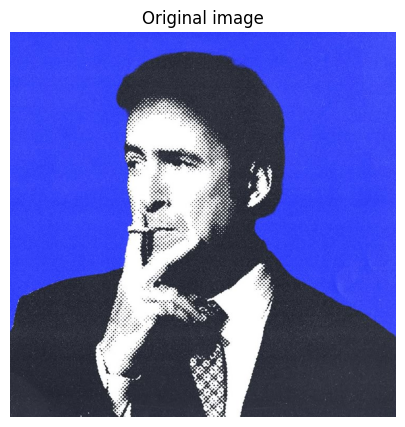

In [ ]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
plt.title('Original image')
plt.imshow(img)
plt.axis('off')
plt.show()

**Laplacian for edge detection**
>* gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) → Convert the image to grayscale (removes color, keeps intensity).

>* laplacian = cv2.Laplacian(gray, cv2.CV_64F) → Apply the Laplacian operator (detects edges, uses 64-bit float for precision). with default kernel of center -4

>* laplacian = np.uint8(np.absolute(laplacian)) → Take absolute values and convert to 8-bit so it can be displayed.

>* return laplacian → Return the Laplacian edge image.

>* Laplacian_edge(image) → Call the function with your image.


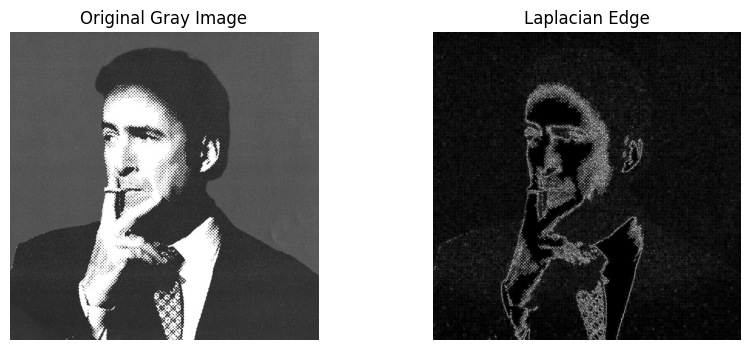

array([[24, 27,  3, ...,  5,  4, 24],
       [15, 16,  6, ...,  6,  9,  5],
       [18, 20,  8, ...,  3,  6,  1],
       ...,
       [13, 17, 17, ...,  3,  2,  0],
       [ 3, 25, 30, ...,  0,  1,  1],
       [18, 35, 24, ...,  2,  5,  6]], dtype=uint8)
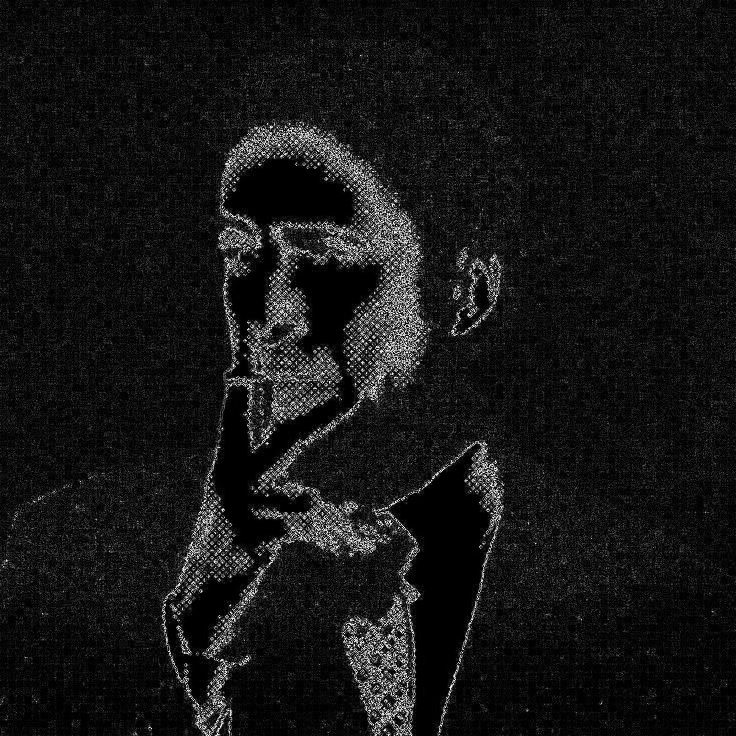

In [ ]:
def Laplacian_edge(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        laplacian = np.uint8(np.absolute(laplacian))
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.title("Original Gray Image")
        plt.imshow(gray, cmap='gray')
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.title("Laplacian Edge")
        plt.imshow(laplacian, cmap='gray')
        plt.axis('off')

        plt.show()
        return laplacian
Laplacian_edge(image)

**Lapacian Sharpening**
>* gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) → Convert the image to grayscale

>* b, g, r = cv2.split(image) → Split the image into blue, green, and red channels.

>* lap_b = cv2.Laplacian(b, cv2.CV_64F) → Apply Laplacian on the blue channel to detect edges.

>* lap_g = cv2.Laplacian(g, cv2.CV_64F) → Apply Laplacian on the green channel.

>* lap_r = cv2.Laplacian(r, cv2.CV_64F) → Apply Laplacian on the red channel.

>* sharp_b = np.clip(b + lap_b, 0, 255).astype(np.uint8) → Add Laplacian to blue channel, clip to 0–255, convert to 8-bit.

>* sharp_g = np.clip(g + lap_g, 0, 255).astype(np.uint8) → Same for green channel.

>* sharp_r = np.clip(r + lap_r, 0, 255).astype(np.uint8) → Same for red channel.

>* sharpened = cv2.merge([sharp_b, sharp_g, sharp_r]) → Merge sharpened channels back into a color image.

>* return sharpened → Return the sharpened image.
> The sharpening equation = Laplacian_edge + image

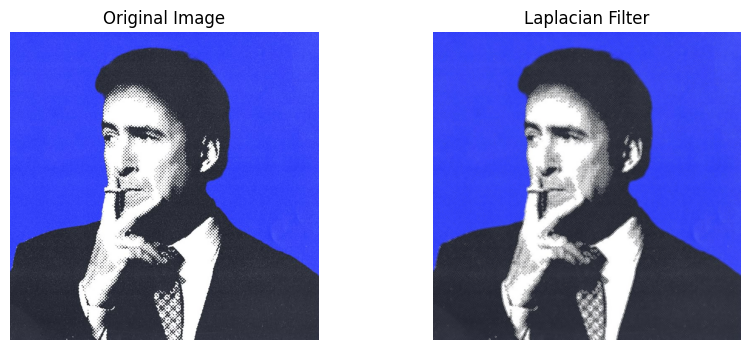

array([[[ 72,  86, 255],
        [ 28,  42, 227],
        [ 48,  62, 247],
        ...,
        [ 62,  73, 249],
        [ 69,  80, 254],
        [ 83,  94, 255]],

       [[ 38,  52, 237],
        [ 63,  77, 255],
        [ 56,  70, 255],
        ...,
        [ 62,  74, 247],
        [ 60,  72, 249],
        [ 70,  82, 254]],

       [[ 37,  51, 235],
        [ 66,  80, 255],
        [ 45,  59, 244],
        ...,
        [ 64,  75, 251],
        [ 63,  74, 249],
        [ 67,  78, 254]],

       ...,

       [[ 63,  65,  78],
        [ 39,  41,  54],
        [ 71,  73,  86],
        ...,
        [ 48,  51,  66],
        [ 48,  51,  66],
        [ 49,  52,  67]],

       [[ 57,  59,  72],
        [ 32,  34,  47],
        [ 76,  78,  91],
        ...,
        [ 50,  53,  68],
        [ 48,  51,  66],
        [ 49,  52,  67]],

       [[ 37,  39,  52],
        [ 82,  84,  97],
        [ 30,  32,  45],
        ...,
        [ 51,  54,  69],
        [ 52,  55,  70],
        [ 52,  55,  70]]], dtype=uint8)
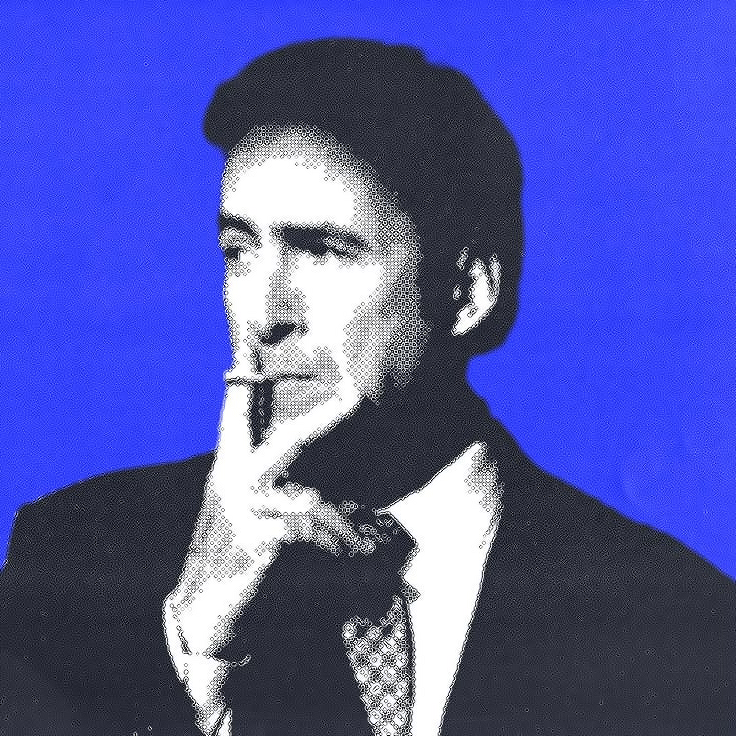

In [ ]:
def Laplacian(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        b, g, r = cv2.split(image)
        lap_b = cv2.Laplacian(b, cv2.CV_64F)
        lap_g = cv2.Laplacian(g, cv2.CV_64F)
        lap_r = cv2.Laplacian(r, cv2.CV_64F)

        sharp_b = np.clip(b +lap_b, 0, 255).astype(np.uint8)
        sharp_g = np.clip(g +lap_g, 0, 255).astype(np.uint8)
        sharp_r = np.clip(r +lap_r, 0, 255).astype(np.uint8)

        sharpened = cv2.merge([sharp_b, sharp_g, sharp_r])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        sharpened = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.title("Original Image")
        plt.imshow(image)
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.title("Laplacian Filter")
        plt.imshow(sharpened)
        plt.axis('off')

        plt.show()
        return sharpened

Laplacian(image)

**Sobel_edge + Sobel_Sharpening**
>* gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) → Convert the image to grayscale

>* sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, kernel) → Compute horizontal edges using the Sobel operator.

>* sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, kernel) → Compute vertical edges using the Sobel operator.

>* sobelx = np.uint8(np.absolute(sobelx)) → Convert horizontal edges to 8-bit for display.

>* sobely = np.uint8(np.absolute(sobely)) → Convert vertical edges to 8-bit.

>* sobel_combined = cv2.bitwise_or(sobelx, sobely) → Combine horizontal and vertical edges.

>* sobel_combined_bgr = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR) → Convert combined edges to BGR to match original image.

>* sharpened = cv2.add(img, sobel_combined_bgr) → Add edges to the original image to create a sharpened effect.

>* return sharpened → Return the sharpened image.

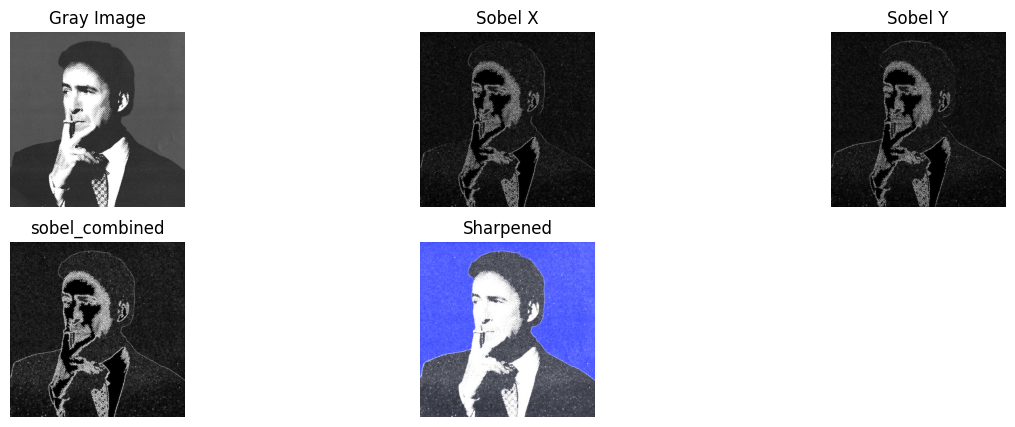

array([[[ 48,  62, 247],
        [ 55,  69, 254],
        [ 53,  67, 252],
        ...,
        [ 85,  96, 255],
        [ 87,  98, 255],
        [ 59,  70, 246]],

       [[ 57,  71, 255],
        [ 60,  74, 255],
        [ 71,  85, 255],
        ...,
        [ 90, 101, 255],
        [ 98, 109, 255],
        [ 91, 102, 255]],

       [[ 67,  81, 255],
        [ 60,  74, 255],
        [ 84,  98, 255],
        ...,
        [ 92, 104, 255],
        [ 76,  88, 255],
        [ 68,  80, 254]],

       ...,

       [[ 86,  88, 101],
        [ 83,  85,  98],
        [139, 141, 154],
        ...,
        [ 56,  59,  74],
        [ 58,  61,  76],
        [ 49,  52,  67]],

       [[ 62,  64,  77],
        [ 70,  72,  85],
        [ 59,  61,  74],
        ...,
        [ 65,  68,  83],
        [ 60,  63,  78],
        [ 60,  63,  78]],

       [[ 55,  57,  70],
        [ 65,  67,  80],
        [ 58,  60,  73],
        ...,
        [ 61,  64,  79],
        [ 57,  60,  75],
        [ 46,  49,  64]]], dtype=uint8)
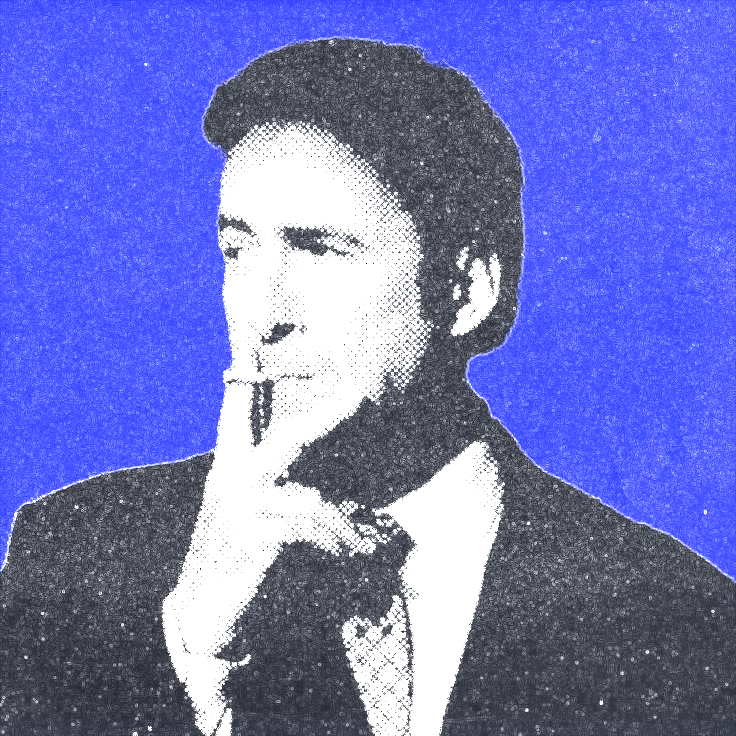

In [ ]:
def sobel_edge(img,kernel):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, kernel)
  sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, kernel)

  sobelx = np.uint8(np.absolute(sobelx))
  sobely = np.uint8(np.absolute(sobely))

  sobel_combined = cv2.bitwise_or(sobelx, sobely)
  sobel_combined_bgr = cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR)
  sharpened = cv2.add(img, sobel_combined_bgr)
  sharpened = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(15,5))
  plt.subplot(2,3,1)
  plt.title("Gray Image")
  plt.imshow(gray, cmap='gray')
  plt.axis('off')
  plt.subplot(2,3,2)
  plt.title("Sobel X")
  plt.imshow(sobelx, cmap='gray')
  plt.axis('off')
  plt.subplot(2,3,3)
  plt.title("Sobel Y")
  plt.imshow(sobely, cmap='gray')
  plt.axis('off')
  plt.subplot(2,3,4)
  plt.title("sobel_combined")
  plt.imshow(sobel_combined , cmap='gray')
  plt.axis('off')
  plt.subplot(2,3,5)
  plt.title("Sharpened")
  plt.imshow(sharpened)
  plt.axis('off')
  plt.show()

  return sharpened
sobel_edge(image,3)


**Prewitt_Edges + Prewitt_Sharpening**
>* gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) → Convert the image to grayscale

>* kernel_x = np.array([...], dtype=np.float32) → Define the horizontal Prewitt kernel.

>* kernel_y = np.array([...], dtype=np.float32) → Define the vertical Prewitt kernel.

>* grad_x = cv2.filter2D(gray, cv2.CV_64F, kernel_x) → Apply horizontal kernel to detect horizontal edges.

>* grad_y = cv2.filter2D(gray, cv2.CV_64F, kernel_y) → Apply vertical kernel to detect vertical edges.

>* grad_x = np.uint8(np.absolute(grad_x)) → Convert horizontal gradients to 8-bit.

>* grad_y = np.uint8(np.absolute(grad_y)) → Convert vertical gradients to 8-bit.

>* prewitt_combined = cv2.bitwise_or(grad_x, grad_y) → Combine horizontal and vertical edges.

>* prewitt_combined_bgr = cv2.cvtColor(prewitt_combined, cv2.COLOR_GRAY2BGR) → Convert combined edges to BGR.

>* sharpened = cv2.add(img, prewitt_combined_bgr) → Add edges to original image to sharpen.

>* return sharpened → Return the sharpened image.


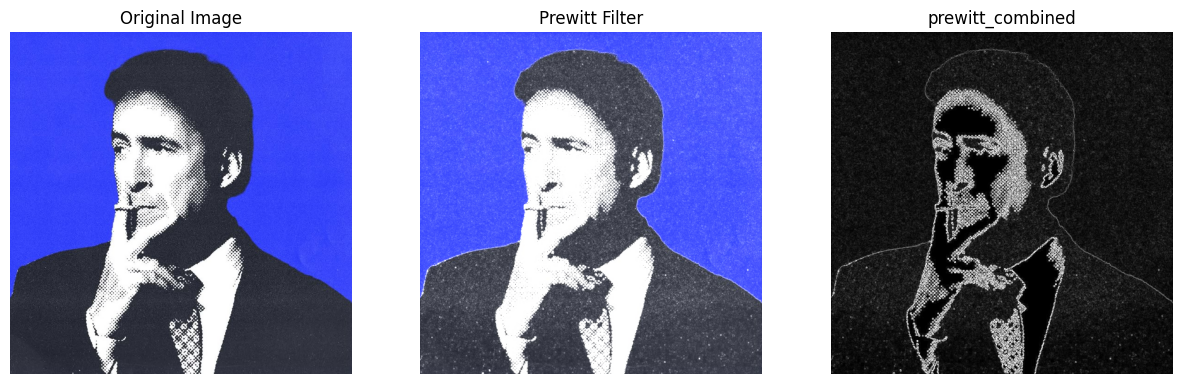

array([[[ 48,  62, 247],
        [ 58,  72, 255],
        [ 58,  72, 255],
        ...,
        [ 82,  93, 255],
        [ 79,  90, 255],
        [ 59,  70, 246]],

       [[ 64,  78, 255],
        [ 49,  63, 248],
        [ 61,  75, 255],
        ...,
        [ 82,  93, 255],
        [ 84,  95, 255],
        [ 82,  93, 255]],

       [[ 63,  77, 255],
        [ 56,  70, 255],
        [ 74,  88, 255],
        ...,
        [ 80,  92, 255],
        [ 75,  87, 255],
        [ 71,  83, 255]],

       ...,

       [[ 79,  81,  94],
        [ 87,  89, 102],
        [115, 117, 130],
        ...,
        [ 56,  59,  74],
        [ 56,  59,  74],
        [ 49,  52,  67]],

       [[ 67,  69,  82],
        [ 62,  64,  77],
        [ 59,  61,  74],
        ...,
        [ 57,  60,  75],
        [ 64,  67,  82],
        [ 57,  60,  75]],

       [[ 55,  57,  70],
        [ 64,  66,  79],
        [ 64,  66,  79],
        ...,
        [ 57,  60,  75],
        [ 54,  57,  72],
        [ 46,  49,  64]]], dtype=uint8)
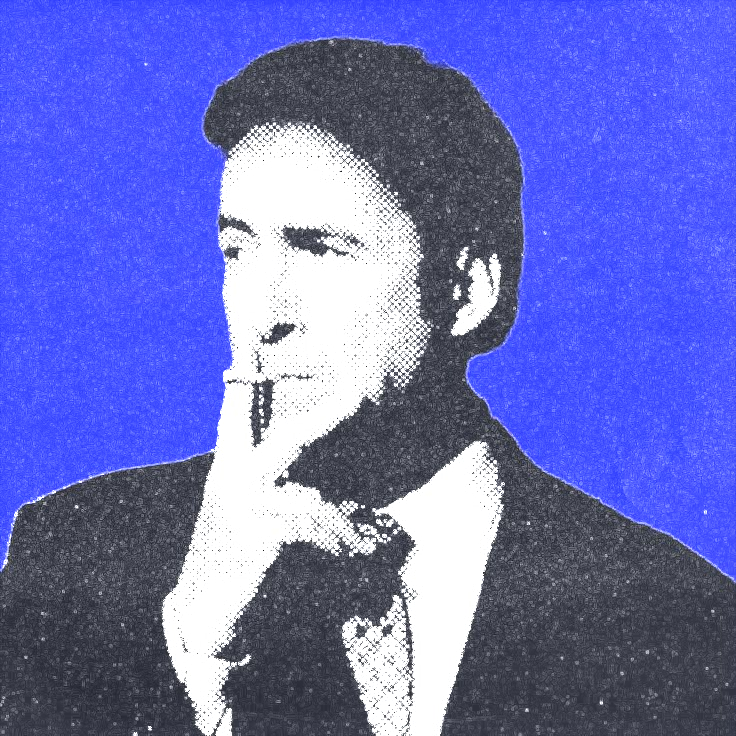

In [ ]:
def prewitt(img):
  gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]], dtype=np.float32)
  kernel_y = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]], dtype=np.float32)
  grad_x = cv2.filter2D(gray, cv2.CV_64F, kernel_x)
  grad_y = cv2.filter2D(gray, cv2.CV_64F, kernel_y)

  grad_x = np.uint8(np.absolute(grad_x))
  grad_y = np.uint8(np.absolute(grad_y))

  prewitt_combined = cv2.bitwise_or(grad_x, grad_y)
  prewitt_combined_bgr = cv2.cvtColor(prewitt_combined, cv2.COLOR_GRAY2BGR)
  sharpened = cv2.add(img, prewitt_combined_bgr)

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  sharpened = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.title("Original Image")
  plt.imshow(img)
  plt.axis('off')
  plt.subplot(1,3,2)
  plt.title("Prewitt Filter")
  plt.imshow(sharpened)
  plt.axis('off')
  plt.subplot(1,3,3)
  plt.title("prewitt_combined")
  plt.imshow(prewitt_combined , cmap='gray')
  plt.axis('off')
  plt.show()

  return sharpened
prewitt(image)
